<a href="https://colab.research.google.com/github/Jiangjiang-111/-/blob/main/%E7%AC%AC%E4%BA%8C%E7%AB%A0%EF%BC%9A%E7%AC%AC%E5%9B%9B%E8%8A%82%E6%95%B0%E6%8D%AE%E5%8F%AF%E8%A7%86%E5%8C%96_%E8%AF%BE%E7%A8%8B(done!).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#加载result.csv这个数据
data = pd.read_csv("/content/drive/MyDrive/hands-on-data-analysis-master/第二章项目集合/result.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

**第8章 绘图和可视化**

1. 介绍 matplotlib

引入 import matplotlib.pyplot as plt

创建图像 plt.figure()

fig.add_subplot()





**pandas中的绘图函数**

cumsum() 算一个数组各行的累加值   cumsum() #沿着axis=0轴（行）计算

* s = Series(值,index= )

* s = DataFrame(值,columns=[ ],index= )

**线型图**

s.plot()

**柱状图**

s.plot(kind=" ",ax=axis[0],stacked=)

* kind="bar" 垂直柱状图,   kind="barh" 水平柱状图

* ax=axis[0] 行作为x轴， ax=axis[1] 列作为x轴，

* stacked=True 生成推挤柱状图，将每行的值堆积在一起



【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

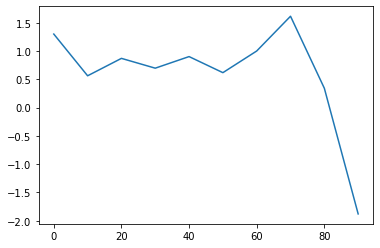

In [8]:
from pandas.io.formats.style_render import Series
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号

s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

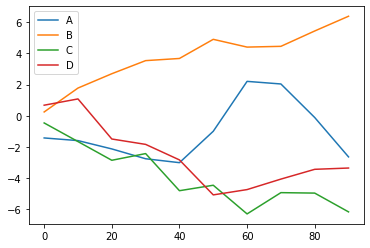

In [9]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
               columns=["A","B","C","D"],
               index=np.arange(0,100,10))
df.plot()

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

groupby 进行数据的分组以及分组后地组内运算

* .groupby( ) 想要按照()进行分组
 
  .groupby([ ， ]) 多组分类

* .groupby( )[] 选取[]需要的类型分组
* .groupby( )[]unstack() 索引重排

In [15]:
#.groupby( )[]unstack()索引重排，示例1
sex = data.groupby("Sex")["Survived"].describe()
sex.head()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [28]:
#.groupby( )[]unstack()索引重排，示例2
sex = data.groupby("Sex")["Survived"].describe().unstack()
sex.head()

       Sex   
count  female    314.000000
       male      577.000000
mean   female      0.742038
       male        0.188908
std    female      0.438211
dtype: float64

In [17]:
#代码编写
sex = data.groupby("Sex")["Survived"].sum()
sex.head()


Sex
female    233
male      109
Name: Survived, dtype: int64

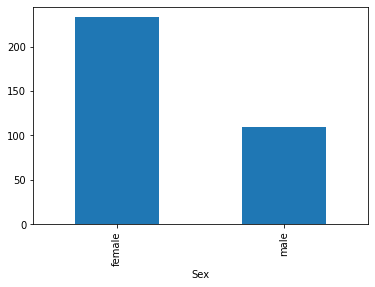

In [18]:
sex.plot(kind="bar")

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [32]:
#思考题回答 

#计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示

# 多组分类，按照存活分类，分别计数0的男女个数，1的男女个数
survived = data.groupby(["Survived","Sex"])["Sex"].count()
survived.head()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

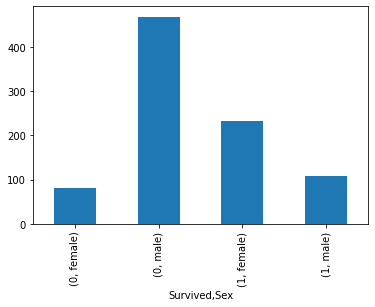

In [34]:
survived.plot(kind="bar")

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

In [21]:
#代码编写
#提示：计算男女中死亡人数 1表示生存，0表示死亡
# 多组分类，先分存活与不存活，再在每种里计数有几个男生，几个女生，再令其重新排列就可以得到目标图像了


survived = data.groupby(["Survived","Sex"])["Survived"].count().unstack()

survived.head()

Sex,female,male
Survived,,
0,81,468
1,233,109


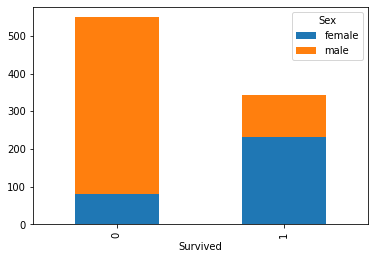

In [22]:
survived.plot(kind="bar",stacked=True)

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [44]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare = data.groupby("Fare")["Survived"].value_counts()
fare.head()

Fare    Survived
0.0000  0           14
        1            1
4.0125  0            1
5.0000  0            1
6.2375  0            1
Name: Survived, dtype: int64

**.value_counts()** 回该列每个项的计数

In [41]:
fare = data.groupby("Fare")["Survived"].value_counts().sort_values(ascending=False)
fare.head()

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
Name: Survived, dtype: int64

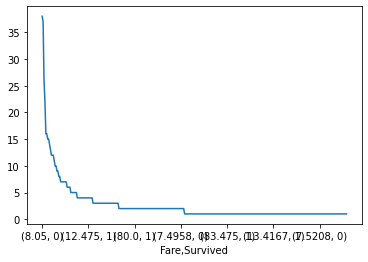

In [42]:
fare.plot()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [52]:
#代码编写
# 1表示生存，0表示死亡

pclass = data.groupby("Pclass")["Survived"].value_counts().unstack()
pclass.head()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


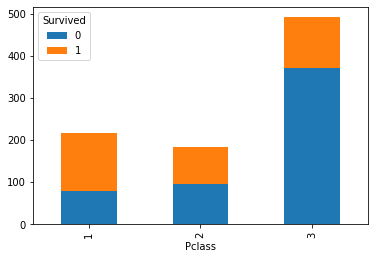

In [53]:
pclass.plot(kind="bar",stacked=True)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [ ]:
#思考题回答
分组的方法真多啊,面对不同的情况，要用不同的函数方法来分组计算，还需要灵活运用到之前学到的函数
函数的图像表达函数还好，固定就几种，折线图和柱状图


#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

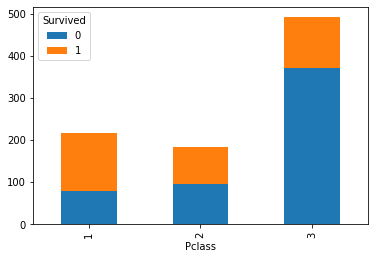

In [60]:
#代码编写
age = data.groupby("Age")["Survived"].value_counts()
age.head()
pclass.plot(kind="bar",stacked=True)

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

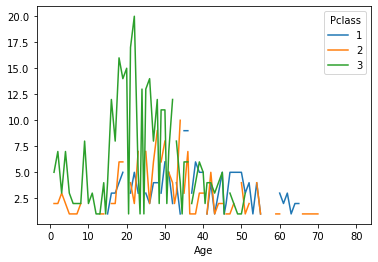

In [67]:
#代码编写
pclass_age = data.groupby("Age")["Pclass"].value_counts().unstack()
pclass_age.head()
pclass_age.plot()

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [ ]:
#思考题回答
写在开头的文字框内啦

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？